# TidyTuesday dataset of [{{<meta date>}}](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/{{<meta iso-date>}})


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [3]:
cranes = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-30/cranes.csv')

In [4]:
cranes

,date,observations,comment,weather_disruption
0,2024-10-03,408.0,Last count of season,False
1,2024-09-30,14940.0,NaN,False
2,2024-09-26,NaN,Canceled/No count,True
3,2024-09-23,18450.0,NaN,False
4,2024-09-19,14900.0,NaN,False
...,...,...,...,...
1543,1994-03-28,NaN,Canceled/No count,False
1544,1994-03-27,NaN,Canceled/No count,False
1545,1994-03-26,NaN,Canceled/No count,False
1546,1994-03-25,200.0,NaN,False


In [5]:
cranes['date'] = pd.to_datetime(cranes['date'])
# add month and year columns. Month should be three letter

cranes['year'] = cranes['date'].dt.year
cranes['month'] = cranes['date'].dt.month

cranes['month'] = cranes['date'].dt.strftime('%b')
cranes['year_half'] = cranes['month'].apply(lambda x: 'first_half' if x in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'] else 'second_half')

In [6]:
cranes

,date,observations,comment,weather_disruption,year,month,year_half
0,2024-10-03,408.0,Last count of season,False,2024,Oct,second_half
1,2024-09-30,14940.0,NaN,False,2024,Sep,second_half
2,2024-09-26,NaN,Canceled/No count,True,2024,Sep,second_half
3,2024-09-23,18450.0,NaN,False,2024,Sep,second_half
4,2024-09-19,14900.0,NaN,False,2024,Sep,second_half
...,...,...,...,...,...,...,...
1543,1994-03-28,NaN,Canceled/No count,False,1994,Mar,first_half
1544,1994-03-27,NaN,Canceled/No count,False,1994,Mar,first_half
1545,1994-03-26,NaN,Canceled/No count,False,1994,Mar,first_half
1546,1994-03-25,200.0,NaN,False,1994,Mar,first_half


In [7]:
df_obs = cranes.groupby(['year','year_half', 'month'])['observations'].sum().reset_index()


C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_45672\3285425748.py:7: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(data=df_obs, x='year', y='observations', col='year_half', kind='point', hue='month', \
C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_45672\3285425748.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticks, fontfamily='monospace')
C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_45672\3285425748.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticks, fontfamily='monospace')
C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_45672\3285425748.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or u

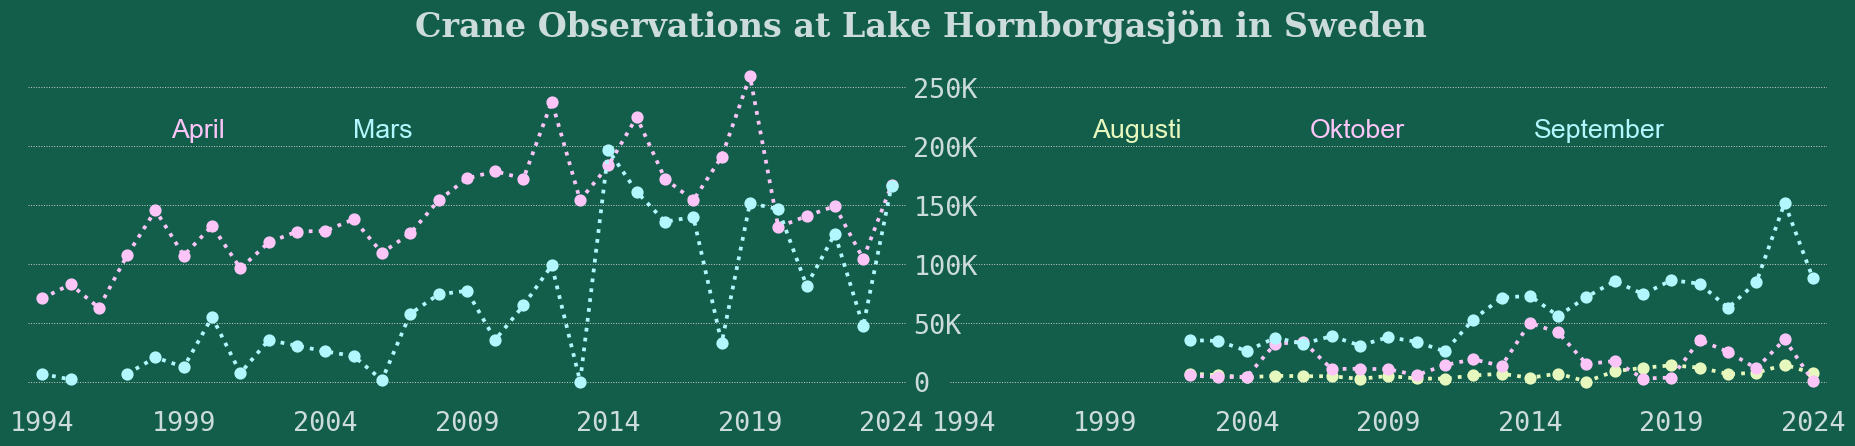

In [13]:
month_mapping = {'Mar':'Mars', 'Apr':'April', 'Aug':'Augusti', 'Sep':'September', 'Oct':'Oktober'}
bg_color = '#135E4B'
fg_color = '#CCDCDB'
custom_map = ['#FCC5F8','#B3F7FE','#E7F8BE']
sns.set_theme(font_scale=1.75)
sns.set_style('white')
g = sns.catplot(data=df_obs, x='year', y='observations', col='year_half', kind='point', hue='month', \
            aspect=2, alpha=1, legend=True, linestyles=':', height=5, palette=custom_map)
g.set_titles(template="")  

legend_labels = list(g._legend_data.keys())

# remove legend
g._legend.remove()
# set x-tick at interval of 10
for ax in g.axes.flat:
    ax.set_xticks(range(0,32,5))
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.yaxis.grid(True,linestyle=':', linewidth=0.7,)
#    ax.xaxis.grid(True,linestyle=':', linewidth=0.3,)
    ax.spines[['left','bottom']].set_visible(False)
    yticks = [f'{int(x/1000)}K' if x > 0 else 0 for x in ax.get_yticks()]
    ax.set_yticklabels(yticks, fontfamily='monospace')
    ax.set_xticklabels(ax.get_xticklabels(), fontfamily='monospace')
    ax.set_facecolor(bg_color)
    ax.tick_params(colors=fg_color)


# Create separate legends for each subplot
for ind, ax in enumerate(g.axes.flat):
    # Get all lines in the subplot
    lines = ax.lines
    
    # Filter lines that have actual data (non-NaN y-values)
    valid_lines = []
    for line in lines:
        # Skip error bars (unlabeled lines)
        if line.get_label() == '':
            continue
            
        # Check if line has non-NaN data
        ydata = line.get_ydata()
        if not np.all(np.isnan(ydata)):
            valid_lines.append(line)
    
    # Extract labels from valid lines
    labels = [line.get_label() for line in valid_lines]
    
    # Sort labels numerically (if possible) or alphabetically
    try:
        # Try to convert labels to integers for numerical sorting
        sorted_indices = sorted(range(len(labels)), key=lambda i: int(labels[i]))
    except ValueError:
        # Fall back to alphabetical sorting if labels aren't numbers
        sorted_indices = sorted(range(len(labels)), key=lambda i: labels[i])
    
    # Reorder lines and labels
    sorted_lines = [valid_lines[i] for i in sorted_indices]
    sorted_labels = [labels[i] for i in sorted_indices]
#    print(sorted_labels)
    dummy_handles = [Line2D([], [], marker='none', linestyle='none') 
                         for _ in sorted_lines]
        
    # Add legend to subplot
    if ind==0:  
        legend = ax.legend(
            handles=dummy_handles, 
            labels=[month_mapping[label] for label in legend_labels[:2]], 
            title='month', 
            loc='upper left',
            frameon=False,
            ncol=3,
            bbox_to_anchor=(0.05, 0.9)
        )
    if ind>0:  
        legend = ax.legend(
            handles=dummy_handles, 
            labels=[month_mapping[label] for label in legend_labels[2:]], 
            title='month', 
            loc='upper left',
            frameon=False,
            ncol=3,
            bbox_to_anchor=(0.05, 0.9)
        )
    for text, line in zip(legend.get_texts(), sorted_lines):
        text.set_color(line.get_color())

     
        # Remove markers from legend handles
    legend.set_title('')



g.axes[0][0].tick_params(labelleft=False)
g.axes[0][1].tick_params(labelleft=True)
g.axes[0][1].tick_params(axis='y', labelleft=True, pad=20) 
g.axes[0][1].set_yticklabels(yticks, ha='left')
g.fig.subplots_adjust(wspace=0.05)
g.fig.suptitle('Crane Observations at Lake Hornborgasjön in Sweden', fontsize=24, family='Serif', \
                weight='bold', color=fg_color)
g.fig.patch.set_facecolor(bg_color)
plt.savefig("cranes_observations.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()